 <center>    <h1>TUGAS JARINGAN SYARAF TIRUAN </h1>   </center>
 <h4>Marsita Harim - E1E120014</h4>
 <h4>Safal - E1E120048</h4>
 <h4>Findryani - E1E120069</h4>
 <h4>Hasna Anggin Tri Muslimin - E1E120071</h4>

 <b>Import library yang diperlukan, seperti Os, TensorFlow, Keras,  PIL (Python Imaging Library), Matplotlib, Skimage.

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

<b>Definisikan fungsi untuk memuat dataset dan melakukan pra-pemrosesan data

In [2]:
# Fungsi untuk memuat citra dari folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
# Fungsi untuk meresize citra
def resize_images(images):
    resized_images = []
    for img in images:
        # Output: Ukuran citra sebelum resize
        print("Original Size:", img.size)
        img = img.resize((224, 224))
        # Output: Ukuran citra setelah resize
        print("Resized Size:", img.size)
        resized_images.append(img)
    return resized_images

In [4]:
# Fungsi untuk mengubah citra ke mode RGB
def convert_to_rgb(images):
    rgb_images = []
    for img in images:
        img = img.convert("RGB")
        rgb_images.append(img)
    return rgb_images

In [5]:
# Fungsi untuk normalisasi citra
def normalize_images(images):
    normalized_images = []
    for img in images:
        img = np.array(img) / 255.0
        normalized_images.append(img)
    return normalized_images

In [6]:
# Fungsi untuk mengubah citra ke grayscale
def convert_to_gray(images):
    gray_images = []
    for img in images:
        gray_img = rgb2gray(img)
        gray_images.append(gray_img)
    return gray_images

In [7]:
# Fungsi untuk melakukan preprocessing pada citra
def preprocess_images(images):
    images = resize_images(images)
    images = convert_to_rgb(images)
    images = normalize_images(images)
    images = convert_to_gray(images)
    images = np.array(images)
    # Menambahkan dimensi channel
    images = np.expand_dims(images, axis=-1)
    return images

<b>Memuat dataset dari setiap folder dan melakukan pra-pemrosesan data

In [11]:
# Memuat citra dari folder 'Cloudy' dan melakukan preprocessing
cloudy_images = load_images_from_folder("C:/Users/HP/Pictures/Weather_Dataset/Cloudy")
cloudy_images = preprocess_images(cloudy_images)

# Memuat citra dari folder 'Rain' dan melakukan preprocessing
rain_images = load_images_from_folder('C:/Users/HP/Pictures/Weather_Dataset/Rain')
rain_images = preprocess_images(rain_images)

# Memuat citra dari folder 'Shine' dan melakukan preprocessing
shine_images = load_images_from_folder('C:/Users/HP/Pictures/Weather_Dataset/Shine')
shine_images = preprocess_images(shine_images)

# Memuat citra dari folder 'Sunrise' dan melakukan preprocessing
sunrise_images = load_images_from_folder('C:/Users/HP/Pictures/Weather_Dataset/Sunrise')
sunrise_images = preprocess_images(sunrise_images)

Original Size: (600, 400)
Resized Size: (224, 224)
Original Size: (271, 186)
Resized Size: (224, 224)
Original Size: (338, 149)
Resized Size: (224, 224)
Original Size: (1024, 675)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (306, 165)
Resized Size: (224, 224)
Original Size: (2000, 2000)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (800, 600)
Resized Size: (224, 224)
Original Size: (400, 300)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (720, 476)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (317, 159)
Re

Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (320, 221)
Resized Size: (224, 224)
Original Size: (3000, 2034)
Resized Size: (224, 224)
Original Size: (360, 270)
Resized Size: (224, 224)
Original Size: (250, 225)
Resized Size: (224, 224)
Original Size: (600, 400)
Resized Size: (224, 224)
Original Size: (650, 487)
Resized Size: (224, 224)
Original Size: (800, 480)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (570, 400)
Resized Size: (224, 224)
Original Size: (2354, 1325)
Resized Size: (224, 224)
Original Size: (800, 600)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (1668, 1500)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (1920, 1080)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224

Resized Size: (224, 224)
Original Size: (1140, 709)
Resized Size: (224, 224)
Original Size: (273, 185)
Resized Size: (224, 224)
Original Size: (615, 412)
Resized Size: (224, 224)
Original Size: (900, 597)
Resized Size: (224, 224)
Original Size: (640, 345)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (318, 159)
Resized Size: (224, 224)
Original Size: (2560, 1600)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (612, 408)
Resized Size: (224, 224)
Original Size: (440, 267)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (480, 360)
Resized Size: (224, 224)
Original Size: (350, 230)
Resized Size: (224, 224)
Original Size: (225, 225)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (281, 180)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Ori

In [12]:
# Menyusun label untuk masing-masing citra
cloudy_labels = np.zeros(len(cloudy_images))
rain_labels = np.ones(len(rain_images))
shine_labels = np.full(len(shine_images), 2)
sunrise_labels = np.full(len(sunrise_images), 3)

<b>Membagi dataset menjadi data latih dan data uji

In [13]:
# Menggabungkan semua citra dan label ke dalam satu array
images = np.concatenate((cloudy_images, rain_images, shine_images, sunrise_images), axis=0)
labels = np.concatenate((cloudy_labels, rain_labels, shine_labels, sunrise_labels), axis=0)

In [14]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

<b>Membangun model CNN/Convolutional Neural Networks untuk mengklasifikasikan cuaca

In [27]:
# Membuat model CNN
model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<b>Mengevaluasi Model menggunakan Data Uji

Epoch 1/10
10/10 [==============================] - 6s 612ms/step - loss: 0.2886 - accuracy: 0.8906 - val_loss: 0.5032 - val_accuracy: 0.7875
Epoch 2/10
10/10 [==============================] - 6s 648ms/step - loss: 0.1922 - accuracy: 0.9469 - val_loss: 0.7184 - val_accuracy: 0.7250
Epoch 3/10
10/10 [==============================] - 6s 612ms/step - loss: 0.1272 - accuracy: 0.9719 - val_loss: 0.8810 - val_accuracy: 0.6875
Epoch 4/10
10/10 [==============================] - 6s 643ms/step - loss: 0.1124 - accuracy: 0.9594 - val_loss: 0.5866 - val_accuracy: 0.8375
Epoch 5/10
10/10 [==============================] - 7s 667ms/step - loss: 0.0919 - accuracy: 0.9688 - val_loss: 0.7868 - val_accuracy: 0.8250
Epoch 6/10
10/10 [==============================] - 6s 554ms/step - loss: 0.0746 - accuracy: 0.9875 - val_loss: 0.6910 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 6s 635ms/step - loss: 0.0651 - accuracy: 0.9906 - val_loss: 0.5579 - val_accuracy: 0.8500
Epoch 

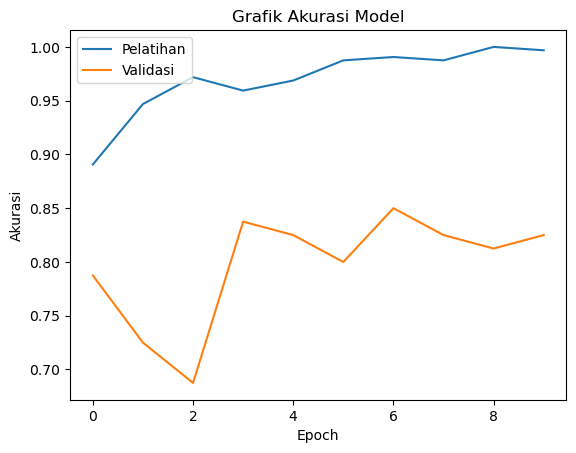

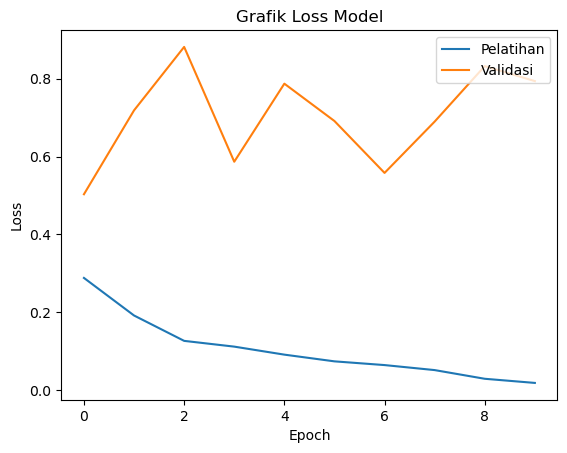

In [23]:
# Memperoleh history dari training model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Pelatihan', 'Validasi'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Pelatihan', 'Validasi'], loc='upper right')
plt.show()

<b>Konversi Citra RGB ke Grayscale dan Prediksi Kondisi Cuaca

In [17]:
# Fungsi konversi citra RGB ke grayscale
def rgb_to_gray(img):
    if img.ndim == 3 and img.shape[-1] == 1:
        return img.squeeze()
    else:
        gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        return gray_img

In [21]:
# Membuat prediksi untuk citra di folder 'weather_dataset'
def predict_weather(image_folder, num_samples=3):
    images = load_images_from_folder(image_folder)
    images = preprocess_images(images)
    predictions = model.predict(images)
    
    weather_labels = ['Berawan', 'Hujan', 'Cerah', 'Matahari Terbit']
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(15, num_samples * 3))

    for i in range(num_samples):
        predicted_label = weather_labels[np.argmax(predictions[i])]

        if num_samples == 1:
            ax_img = axes[0]
            ax_glcm = axes[1]
        else:
            ax_img = axes[i, 0]
            ax_glcm = axes[i, 1]

        ax_img.imshow(images[i], cmap='gray')
        ax_img.set_title(f'Kondisi: {predicted_label}')
        ax_img.axis('off')

        # Menghitung GLCM
        gray_img = rgb_to_gray(images[i])
        gray_img_int = (gray_img * 255).astype(np.uint8)
        glcm = graycomatrix(gray_img_int, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Menghitung properti GLCM
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        asm = graycoprops(glcm, 'ASM')[0, 0]
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

        # Menampilkan properti GLCM
        properties = ['Dissimilarity', 'ASM', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']
        values = [dissimilarity, asm, contrast, correlation, energy, homogeneity]

        ax_glcm.barh(properties, values)
        ax_glcm.set_title('GLCM')
        ax_glcm.set_xlim([0, 1])

    plt.tight_layout()
    plt.show()

<b>Memuat dan Memprediksi Kondisi Cuaca untuk Citra dengan Kondisi yang Ada

Original Size: (600, 400)
Resized Size: (224, 224)
Original Size: (271, 186)
Resized Size: (224, 224)
Original Size: (338, 149)
Resized Size: (224, 224)
Original Size: (1024, 675)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (306, 165)
Resized Size: (224, 224)
Original Size: (2000, 2000)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (800, 600)
Resized Size: (224, 224)
Original Size: (400, 300)
Resized Size: (224, 224)
Original Size: (299, 168)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (720, 476)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (317, 159)
Re

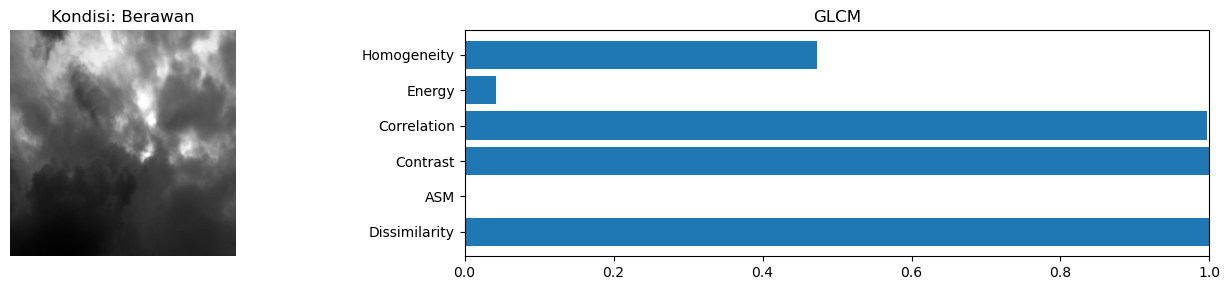

Original Size: (360, 270)
Resized Size: (224, 224)
Original Size: (660, 400)
Resized Size: (224, 224)
Original Size: (2059, 1158)
Resized Size: (224, 224)
Original Size: (759, 422)
Resized Size: (224, 224)
Original Size: (268, 188)
Resized Size: (224, 224)
Original Size: (1024, 626)
Resized Size: (224, 224)
Original Size: (500, 400)
Resized Size: (224, 224)
Original Size: (640, 480)
Resized Size: (224, 224)
Original Size: (480, 388)
Resized Size: (224, 224)
Original Size: (280, 180)
Resized Size: (224, 224)
Original Size: (635, 423)
Resized Size: (224, 224)
Original Size: (634, 422)
Resized Size: (224, 224)
Original Size: (250, 225)
Resized Size: (224, 224)
Original Size: (620, 413)
Resized Size: (224, 224)
Original Size: (620, 413)
Resized Size: (224, 224)
Original Size: (3500, 2453)
Resized Size: (224, 224)
Original Size: (635, 459)
Resized Size: (224, 224)
Original Size: (640, 420)
Resized Size: (224, 224)
Original Size: (1000, 746)
Resized Size: (224, 224)
Original Size: (590, 329)

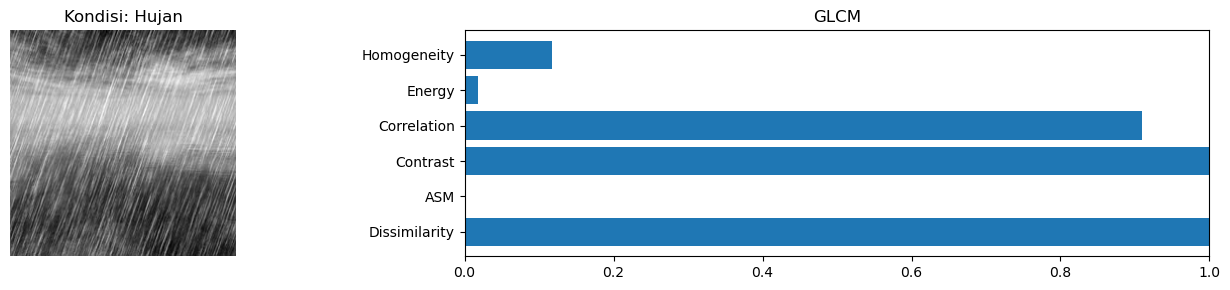

Original Size: (1920, 1080)
Resized Size: (224, 224)
Original Size: (168, 300)
Resized Size: (224, 224)
Original Size: (480, 640)
Resized Size: (224, 224)
Original Size: (183, 275)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (276, 183)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (283, 178)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (1024, 768)
Resized Size: (224, 224)
Original Size: (286, 176)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (225, 225)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (852, 480)
Resized Size: (224, 224)
Original Size: (299, 168)
Re

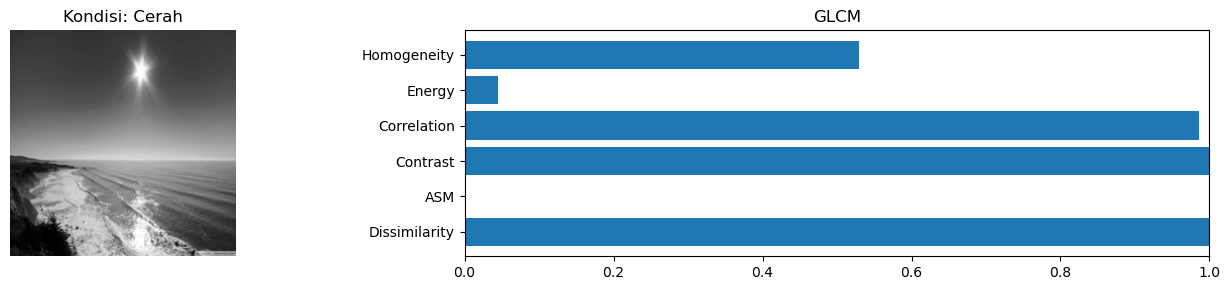

Original Size: (750, 500)
Resized Size: (224, 224)
Original Size: (2304, 1728)
Resized Size: (224, 224)
Original Size: (360, 240)
Resized Size: (224, 224)
Original Size: (259, 194)
Resized Size: (224, 224)
Original Size: (480, 360)
Resized Size: (224, 224)
Original Size: (480, 360)
Resized Size: (224, 224)
Original Size: (1000, 667)
Resized Size: (224, 224)
Original Size: (300, 168)
Resized Size: (224, 224)
Original Size: (4261, 3195)
Resized Size: (224, 224)
Original Size: (284, 177)
Resized Size: (224, 224)
Original Size: (1920, 1080)
Resized Size: (224, 224)
Original Size: (275, 184)
Resized Size: (224, 224)
Original Size: (275, 183)
Resized Size: (224, 224)
Original Size: (278, 181)
Resized Size: (224, 224)
Original Size: (969, 545)
Resized Size: (224, 224)
Original Size: (557, 900)
Resized Size: (224, 224)
Original Size: (4261, 3195)
Resized Size: (224, 224)
Original Size: (292, 173)
Resized Size: (224, 224)
Original Size: (320, 210)
Resized Size: (224, 224)
Original Size: (259, 1

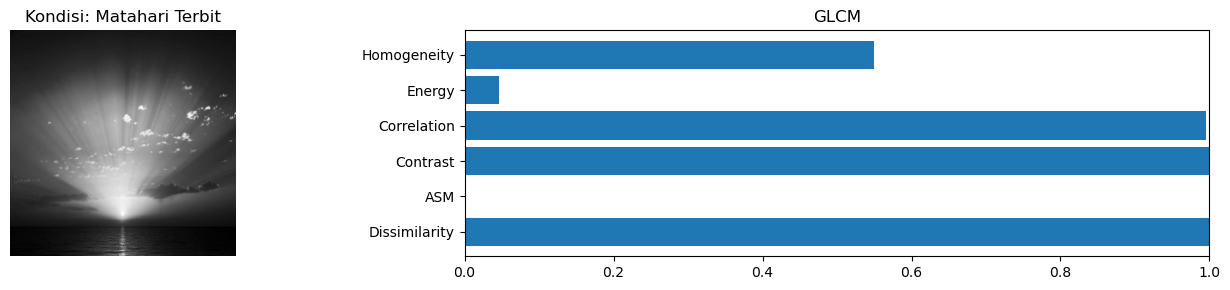

In [20]:
predict_weather('C:/Users/HP/Pictures/Weather_Dataset/Cloudy', num_samples=1)
predict_weather('C:/Users/HP/Pictures/Weather_Dataset/Rain', num_samples=1)
predict_weather('C:/Users/HP/Pictures/Weather_Dataset/Shine', num_samples=1)
predict_weather('C:/Users/HP/Pictures/Weather_Dataset/Sunrise', num_samples=1)